<a href="https://colab.research.google.com/github/fiap-ia-2025/chap1-phase05-farm-tech/blob/clustering-e-modelagem/FarmTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Bibliotecas importadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


## 📌 1. Carregamento e inspeção dos dados


In [2]:
# Carregar dataset
df = pd.read_csv("crop_yield.csv")

# Visualizar primeiras linhas
display(df.head())

# Informações gerais
df.info()

# Estatísticas descritivas
df.describe(include="all")


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156,156.000000,156.000000,156.000000,156.00000,156.000000
unique,4,NaN,NaN,NaN,NaN,NaN
top,"Cocoa, beans",NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN
mean,NaN,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,NaN,289.457914,0.293923,0.996226,0.26105,70421.958897
min,NaN,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,NaN,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,NaN,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,NaN,2718.080000,18.400000,85.510000,26.30000,67518.750000


# 🔍 Análise de Clustering e Padrões Ambientais

Nesta etapa aplicamos técnicas de **clustering** para identificar **grupos naturais** dentro dos dados ambientais e de produtividade.  
O objetivo é descobrir **padrões ocultos** que não são visíveis apenas pela análise descritiva tradicional, permitindo:  

- Agrupar condições climáticas semelhantes que influenciam o rendimento.  
- Detectar **cenários discrepantes** (anomalias) que podem representar eventos climáticos extremos ou falhas de medição.  
- Explorar a **sazonalidade e tendências temporais** associadas à produtividade agrícola.  
- Segmentar os dados também por **tipo de cultura**, permitindo comparações entre diferentes realidades produtivas.  

Essa abordagem fornece uma **visão exploratória estruturada**, funcionando como base para a etapa seguinte de **modelagem preditiva**, onde cada padrão identificado pode melhorar a capacidade de previsão e apoiar práticas de **agricultura de precisão**.




---

## 📌 2. Pré-processamento

---



In [3]:
# One-hot encoding da coluna categórica 'Crop'
if "Crop" in df.columns:
    df_proc = pd.get_dummies(df, columns=["Crop"], drop_first=True)
else:
    df_proc = df.copy()

# Remover coluna alvo Yield para clustering
X = df_proc.drop(columns=["Yield"], errors="ignore")

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape dos dados após pré-processamento:", X_scaled.shape)


Shape dos dados após pré-processamento: (156, 7)


---

## 📌 3. Análise exploratória rápida

---


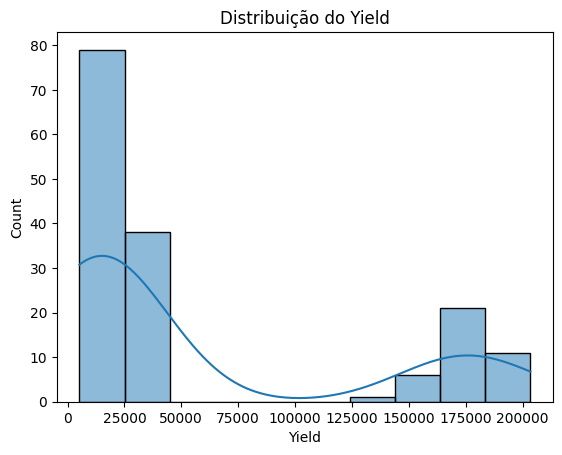

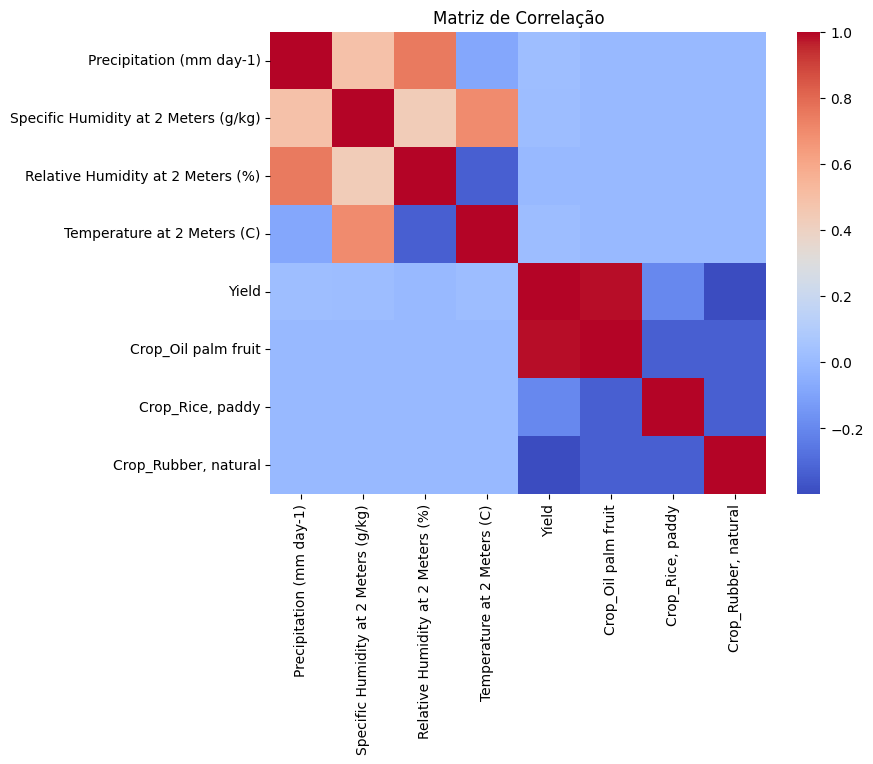

In [4]:
# Distribuição do Yield
sns.histplot(df["Yield"], kde=True)
plt.title("Distribuição do Yield")
plt.show()

# Correlação entre variáveis
plt.figure(figsize=(8,6))
sns.heatmap(df_proc.corr(), annot=False, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


---

## 📌 4. Determinação do número ótimo de clusters

---


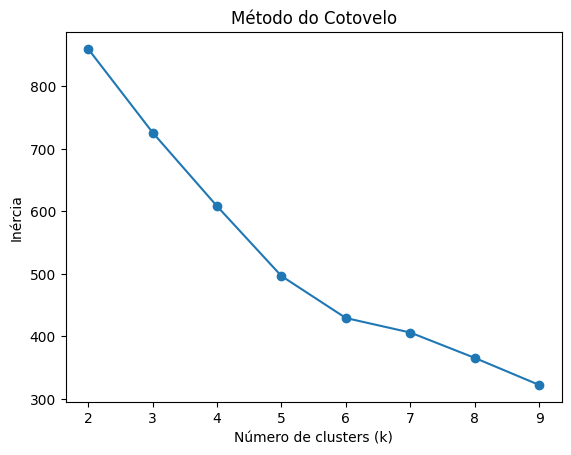

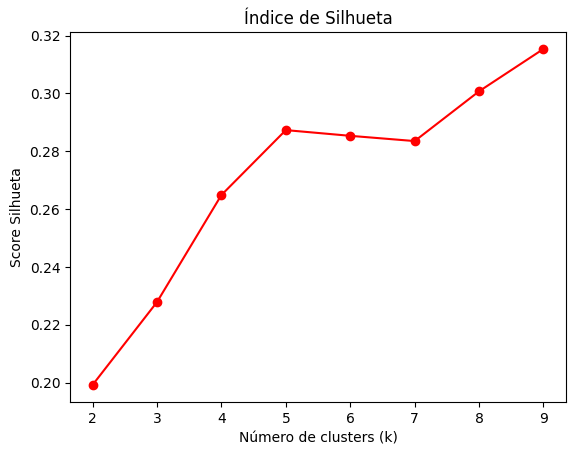

In [5]:
# Listas para armazenar as métricas para cada valor de k
inertia = []      # Armazena a soma das distâncias quadráticas internas (métrica do cotovelo)
silhouette = []   # Armazena o índice de silhueta para cada k

# Intervalo de valores de k a serem testados (de 2 até 9 clusters)
K_range = range(2, 10)

# Loop para treinar KMeans em diferentes números de clusters
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")  # cria o modelo
    labels = km.fit_predict(X_scaled)  # ajusta o modelo e obtém os rótulos dos clusters
    inertia.append(km.inertia_)  # salva a inércia (qualidade da compactação dos clusters)
    silhouette.append(silhouette_score(X_scaled, labels))  # salva o score de silhueta

# Plot do método do cotovelo → ajuda a identificar o "k ótimo" analisando a curva de inércia
plt.plot(K_range, inertia, marker="o")
plt.title("Método do Cotovelo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.show()

# Plot do índice de silhueta → mede a separação e coesão dos clusters
plt.plot(K_range, silhouette, marker="o", color="red")
plt.title("Índice de Silhueta")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Score Silhueta")
plt.show()


---

## 📌 5. Clusterização com diferentes algoritmos

---

In [6]:
# KMeans com número ótimo (ex: 3, ajuste após gráfico)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)

# DBSCAN (ajustar eps/min_samples se necessário)
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=best_k)
df["Cluster_Agglomerative"] = agg.fit_predict(X_scaled)

df.head()


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Cluster_KMeans,Cluster_DBSCAN,Cluster_Agglomerative
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560,1,0,0
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253,1,-1,0
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456,1,0,0
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321,2,0,0
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800,1,0,0


---

## 📌 6. Avaliação dos clusters

---

In [7]:
# Função para avaliar a qualidade dos clusters formados
def avaliar_clusters(X, labels, nome):
    # Verifica se há mais de 1 cluster e se não existe o rótulo -1 (ruído no DBSCAN)
    if len(set(labels)) > 1 and -1 not in set(labels):  # Evita DBSCAN com clusters inválidos
        # Calcula métricas de avaliação de clustering
        sil = silhouette_score(X, labels)               # Índice de Silhueta → mede coesão e separação
        dbi = davies_bouldin_score(X, labels)           # Índice Davies-Bouldin → quanto menor, melhor
        chi = calinski_harabasz_score(X, labels)        # Índice Calinski-Harabasz → quanto maior, melhor
        # Exibe os resultados formatados
        print(f"{nome}: Silhouette={sil:.3f}, DBI={dbi:.3f}, CHI={chi:.1f}")
    else:
        # Caso os clusters não sejam válidos, evita erro e informa ao usuário
        print(f"{nome}: não foi possível calcular métricas adequadas (clusters inválidos)")

# Avalia os diferentes algoritmos de clustering utilizados no projeto
avaliar_clusters(X_scaled, df["Cluster_KMeans"], "KMeans")
avaliar_clusters(X_scaled, df["Cluster_DBSCAN"], "DBSCAN")
avaliar_clusters(X_scaled, df["Cluster_Agglomerative"], "Agglomerative")

KMeans: Silhouette=0.228, DBI=1.635, CHI=38.5
DBSCAN: não foi possível calcular métricas adequadas (clusters inválidos)
Agglomerative: Silhouette=0.275, DBI=1.567, CHI=38.2


### 📊 Avaliação de Qualidade dos Clusters  

Após aplicar diferentes algoritmos de clustering, utilizamos três métricas clássicas para avaliar a qualidade dos agrupamentos gerados:  

- **Índice de Silhueta (Silhouette Score)**  
  Mede o quão bem os elementos estão agrupados em relação ao seu próprio cluster comparado a outros clusters.  
  - Valores próximos de **1** indicam boa separação e coesão.  
  - Valores próximos de **0** indicam clusters sobrepostos.  
  - Valores negativos indicam má classificação.  

- **Índice Davies-Bouldin (DBI)**  
  Avalia a média da razão entre a dispersão dentro dos clusters e a separação entre eles.  
  - **Quanto menor o valor, melhor** a separação entre os grupos.  
  - Valores próximos de **0** indicam clusters bem definidos.  

- **Índice Calinski-Harabasz (CHI)**  
  Mede a razão entre a dispersão entre clusters e a dispersão dentro dos clusters.  
  - **Quanto maior, melhor** a definição dos agrupamentos.  
  - Indica clusters mais densos e bem separados.  

Essas métricas fornecem diferentes perspectivas sobre a qualidade do particionamento:  
- **Silhouette** enfatiza a proximidade dos pontos com seu cluster.  
- **DBI** foca na separação relativa entre clusters.  
- **CHI** mede a compacidade interna e a separação entre grupos.  

🔎 Dessa forma, ao analisar os resultados em conjunto, conseguimos identificar qual algoritmo gerou **grupos mais consistentes e interpretáveis**, garantindo maior confiabilidade na segmentação dos dados agrícolas.  


---

## 📌 7. Visualização com PCA

---

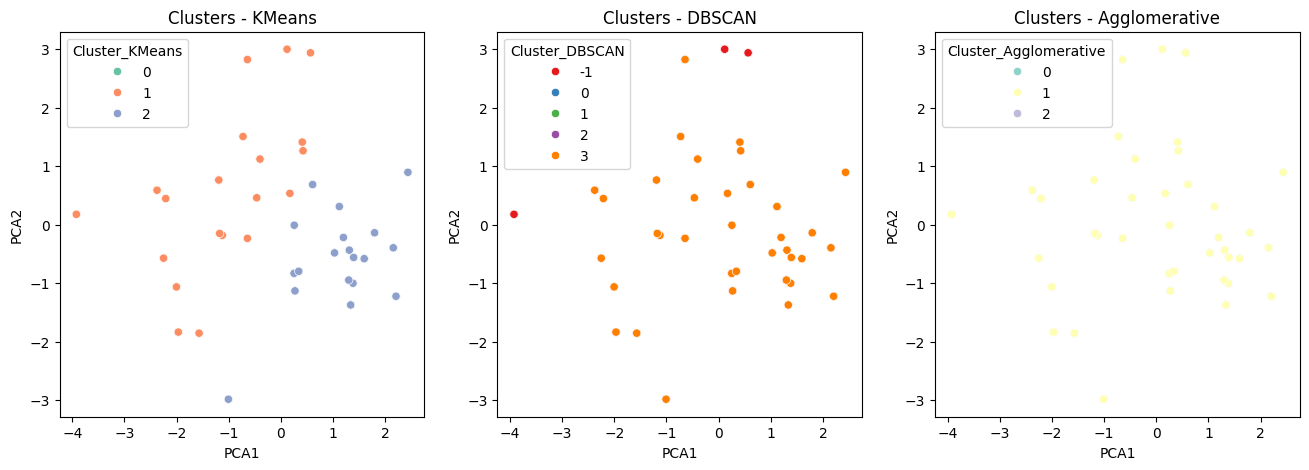

In [8]:
# Aplicação do PCA para reduzir os dados para 2 dimensões principais
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Adiciona as duas componentes principais ao DataFrame
df["PCA1"], df["PCA2"] = pca_result[:,0], pca_result[:,1]

# Define o tamanho da figura para comportar 3 subplots lado a lado
plt.figure(figsize=(16,5))

# --- Plot 1: Visualização dos clusters gerados pelo KMeans ---
plt.subplot(1,3,1)  # Cria o primeiro subplot (linha 1, coluna 3, posição 1)
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster_KMeans", palette="Set2")
plt.title("Clusters - KMeans")

# --- Plot 2: Visualização dos clusters gerados pelo DBSCAN ---
plt.subplot(1,3,2)  # Segundo subplot
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster_DBSCAN", palette="Set1")
plt.title("Clusters - DBSCAN")

# --- Plot 3: Visualização dos clusters gerados pelo Agglomerative ---
plt.subplot(1,3,3)  # Terceiro subplot
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster_Agglomerative", palette="Set3")
plt.title("Clusters - Agglomerative")

# Mostra todos os gráficos na tela
plt.show()


---

## 📌 8. Visualização com t-SNE

---

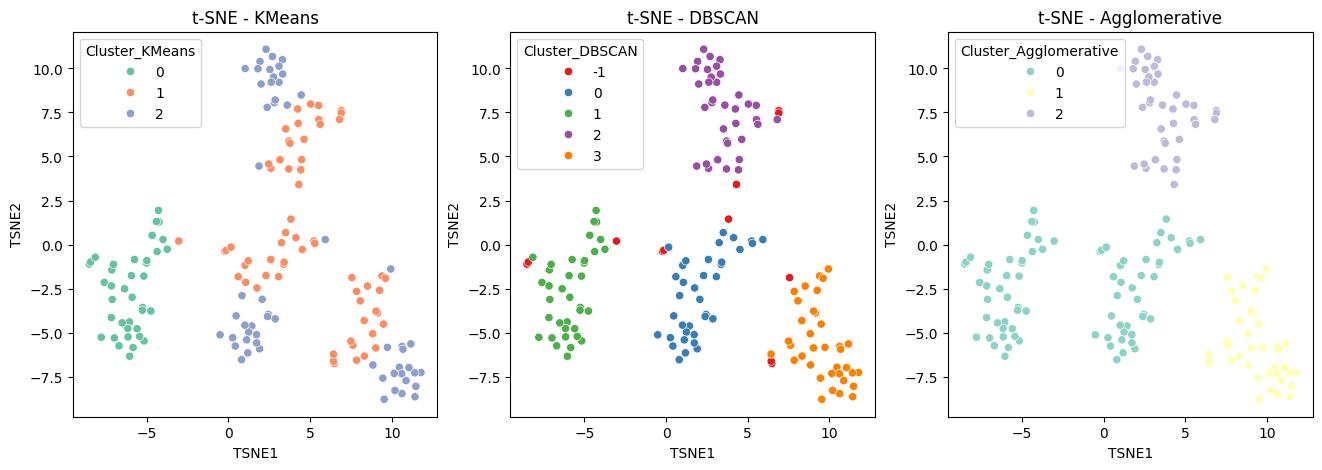

In [9]:
# Aplicando t-SNE para reduzir a dimensionalidade dos dados para 2 componentes
# - n_components=2: reduz para duas dimensões (ideal para visualização)
# - random_state=42: garante reprodutibilidade
# - perplexity=30: parâmetro de balanceamento entre vizinhos locais e globais
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

# Executando o t-SNE nos dados já escalonados
tsne_result = tsne.fit_transform(X_scaled)

# Salvando as duas novas dimensões (TSNE1 e TSNE2) no DataFrame
df["TSNE1"], df["TSNE2"] = tsne_result[:,0], tsne_result[:,1]

# Criando figura com 3 subplots lado a lado
plt.figure(figsize=(16,5))

# Plot 1: visualização dos clusters obtidos pelo KMeans
plt.subplot(1,3,1)
sns.scatterplot(data=df, x="TSNE1", y="TSNE2", hue="Cluster_KMeans", palette="Set2")
plt.title("t-SNE - KMeans")

# Plot 2: visualização dos clusters obtidos pelo DBSCAN
plt.subplot(1,3,2)
sns.scatterplot(data=df, x="TSNE1", y="TSNE2", hue="Cluster_DBSCAN", palette="Set1")
plt.title("t-SNE - DBSCAN")

# Plot 3: visualização dos clusters obtidos pelo Agglomerative Clustering
plt.subplot(1,3,3)
sns.scatterplot(data=df, x="TSNE1", y="TSNE2", hue="Cluster_Agglomerative", palette="Set3")
plt.title("t-SNE - Agglomerative")

# Exibindo os gráficos
plt.show()


---

## 📌 9. Resumo dos clusters (Yield por cluster)

---

In [10]:
# Loop para percorrer as três colunas de clusters (KMeans, DBSCAN e Agglomerative)
for col in ["Cluster_KMeans", "Cluster_DBSCAN", "Cluster_Agglomerative"]:
    # Imprime o nome do cluster que está sendo resumido
    print(f"\nResumo por {col}:")

    # Agrupa os dados pelo cluster atual e calcula estatísticas descritivas da variável "Yield"
    # - mean: média da produtividade
    # - std: desvio padrão
    # - min: valor mínimo
    # - max: valor máximo
    # - count: número de observações em cada cluster
    display(df.groupby(col)["Yield"].agg(["mean","std","min","max","count"]))




Resumo por Cluster_KMeans:


,mean,std,min,max,count
Cluster_KMeans,,,,,
0,175130.184211,14505.025272,142425,203399,38
1,19003.934426,26295.959665,5571,201436,61
2,16591.157895,12028.952236,5249,38763,57



Resumo por Cluster_DBSCAN:


,mean,std,min,max,count
Cluster_DBSCAN,,,,,
-1,55354.333333,72320.628613,5693,201436,12
0,8778.861111,1702.422428,5765,13056,36
1,176108.916667,13809.036570,150428,203399,36
2,32101.777778,4727.344444,24686,42550,36
3,7889.083333,1587.238561,5249,10285,36



Resumo por Cluster_Agglomerative:


,mean,std,min,max,count
Cluster_Agglomerative,,,,,
0,92343.910256,84661.233058,5765,203399,78
1,7824.897436,1600.255042,5249,10285,39
2,32099.666667,4789.948436,24686,42550,39


---

## 📌 10. Identificação de Outliers (DBSCAN)

---

Número de outliers detectados pelo DBSCAN: 12

Yield - Outliers


,Yield
count,12.000000
mean,55354.333333
std,72320.628613
min,5693.000000
25%,8833.000000
50%,19553.000000
75%,65437.500000
max,201436.000000



Yield - Dados sem outliers


,Yield
count,144.000000
mean,56219.659722
std,70519.689502
min,5249.000000
25%,8327.750000
50%,18871.000000
75%,69519.500000
max,203399.000000


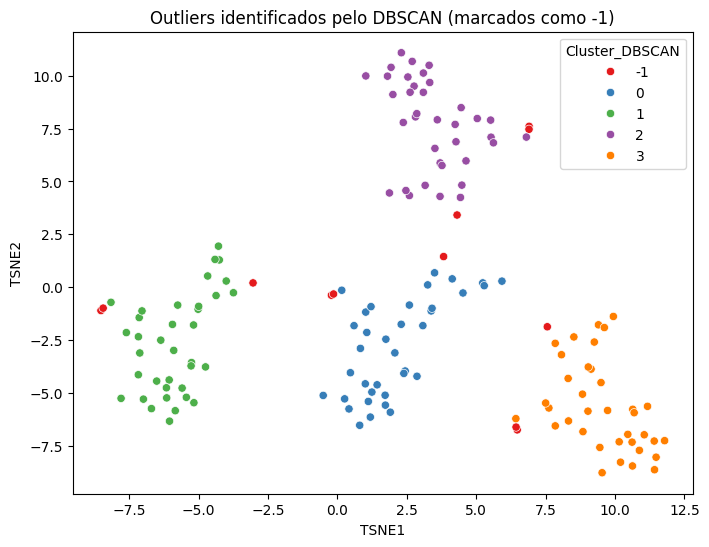

In [11]:
outliers = df[df["Cluster_DBSCAN"] == -1]
print(f"Número de outliers detectados pelo DBSCAN: {len(outliers)}")

# Estatísticas dos outliers comparadas ao resto
print("\nYield - Outliers")
display(outliers["Yield"].describe())

print("\nYield - Dados sem outliers")
display(df[df["Cluster_DBSCAN"] != -1]["Yield"].describe())

# Visualização dos outliers em t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="TSNE1", y="TSNE2", hue="Cluster_DBSCAN", palette="Set1")
plt.title("Outliers identificados pelo DBSCAN (marcados como -1)")
plt.show()

---

## 📌 11. Tendências de rendimento por cluster (KMeans)

---

,mean,std,count
Cluster_KMeans,,,
2,16591.157895,12028.952236,57
1,19003.934426,26295.959665,61
0,175130.184211,14505.025272,38


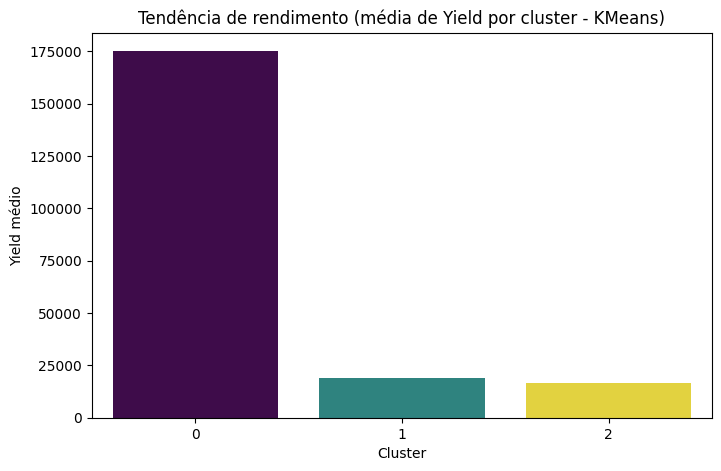

In [12]:
cluster_summary = df.groupby("Cluster_KMeans")["Yield"].agg(["mean","std","count"]).sort_values("mean")
display(cluster_summary)

# Gráfico para visualizar tendência
plt.figure(figsize=(8,5))
sns.barplot(x=cluster_summary.index,
            y=cluster_summary["mean"],
            hue=cluster_summary.index,
            palette="viridis",
            legend=False)
plt.title("Tendência de rendimento (média de Yield por cluster - KMeans)")
plt.ylabel("Yield médio")
plt.xlabel("Cluster")
plt.show()

---

## 📊 Comparação Final: Yield Médio por Cluster (Ordenado)

---

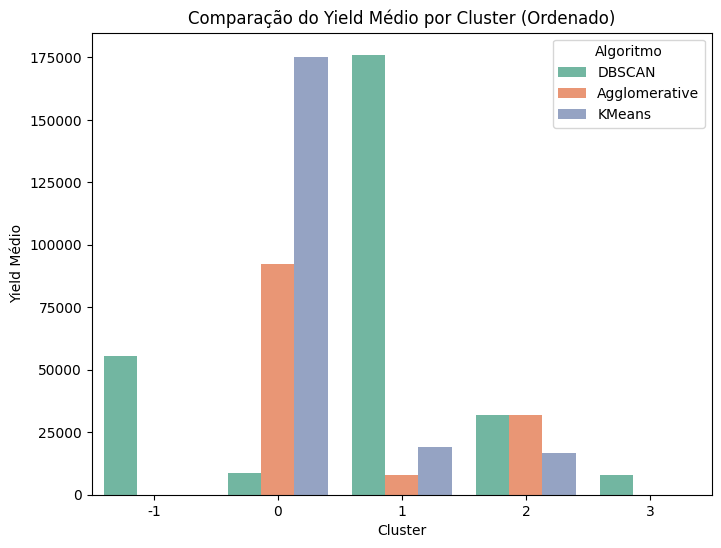

In [13]:
# Função para resumir Yield por cluster
def resumo_clusters(df, col_cluster, algoritmo):
    temp = df.groupby(col_cluster)["Yield"].mean().reset_index()
    temp.rename(columns={col_cluster: "Cluster"}, inplace=True)
    temp["Algoritmo"] = algoritmo
    return temp

# Criar resumos
res_kmeans = resumo_clusters(df, "Cluster_KMeans", "KMeans")
res_dbscan = resumo_clusters(df, "Cluster_DBSCAN", "DBSCAN")
res_agg = resumo_clusters(df, "Cluster_Agglomerative", "Agglomerative")

# Concatenar tudo
resumo = pd.concat([res_kmeans, res_dbscan, res_agg], ignore_index=True)

# Ordenar clusters pelo Yield médio (dentro de cada algoritmo)
resumo_sorted = resumo.sort_values(by="Yield", ascending=True)

# Plot ordenado
plt.figure(figsize=(8,6))
sns.barplot(data=resumo_sorted,
            x="Cluster",
            y="Yield",
            hue="Algoritmo",
            palette="Set2")
plt.title("Comparação do Yield Médio por Cluster (Ordenado)")
plt.xlabel("Cluster")
plt.ylabel("Yield Médio")
plt.legend(title="Algoritmo")
plt.show()


---

## 📊 Tendências Sazonais e Padrões Temporais (versão melhorada)

---

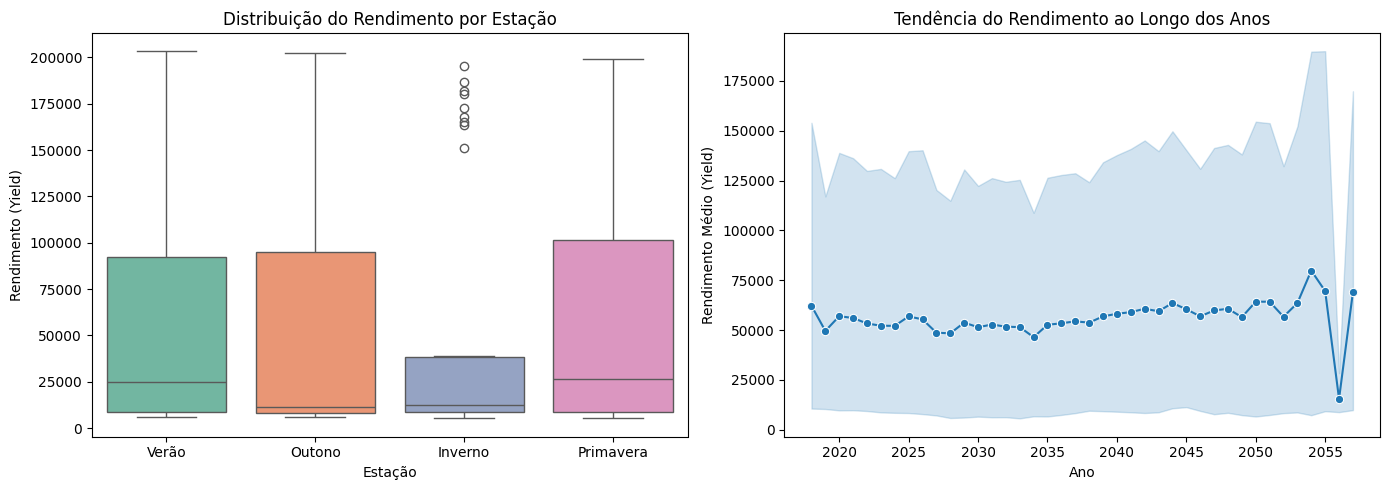

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


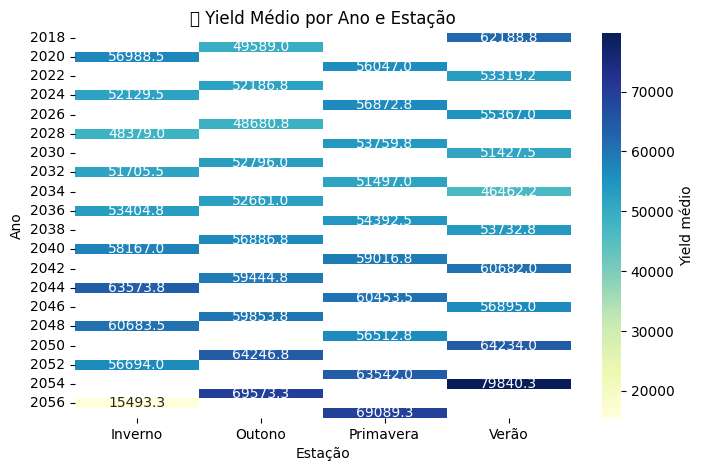

📌 Estatísticas de Yield por Estação


,Season,mean,std,min,max
0,Inverno,52650.820513,68324.291207,5571,195523
1,Outono,56259.025641,71117.938423,6008,202379
2,Primavera,57837.025641,72560.727420,5249,199074
3,Verão,57865.512821,72242.508137,6248,203399



📌 Estatísticas de Yield por Ano


,Year,mean,std,min,max
0,2018,62188.750000,93118.036911,9718,201436
1,2019,49589.000000,68859.207257,9573,152343
2,2020,56988.500000,83606.120516,9456,181826
3,2021,56047.000000,81799.930970,9321,178183
4,2022,53319.250000,77976.186482,8800,169781
5,2023,52186.750000,76302.211804,8604,166042
6,2024,52129.500000,75885.419278,8002,165262
7,2025,56872.750000,84586.813099,6913,183004
8,2026,55367.000000,82018.303433,6546,177543
9,2027,48680.750000,68678.546274,6077,150428


In [14]:
# Criando coluna de estações do ano (cíclica)
seasons = ["Verão", "Outono", "Inverno", "Primavera"]
df["Season"] = [seasons[i % 4] for i in range(len(df))]

# Criando também coluna de anos (simulação de 2018 a 2022)
years = np.arange(2018, 2018 + len(df)//len(seasons) + 1)
df["Year"] = [years[i % len(years)] for i in range(len(df))]

# Resumo estatístico por estação
season_summary = df.groupby("Season")["Yield"].agg(["mean", "std", "min", "max"]).reset_index()

# Resumo estatístico por ano
year_summary = df.groupby("Year")["Yield"].agg(["mean", "std", "min", "max"]).reset_index()

# =====================================================
# 📊 Visualizações
# =====================================================

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Boxplot por estação (corrigido)
sns.boxplot(data=df, x="Season", y="Yield", hue="Season", palette="Set2", legend=False, ax=axes[0])
axes[0].set_title("Distribuição do Rendimento por Estação")
axes[0].set_ylabel("Rendimento (Yield)")
axes[0].set_xlabel("Estação")

# Linha temporal por ano
sns.lineplot(data=df, x="Year", y="Yield", marker="o", ax=axes[1])
axes[1].set_title("Tendência do Rendimento ao Longo dos Anos")
axes[1].set_ylabel("Rendimento Médio (Yield)")
axes[1].set_xlabel("Ano")

plt.tight_layout()
plt.show()

# =====================================================
# 📊 Tabelas mais intuitivas
# =====================================================

# Pivot table de Yield médio por estação e ano
pivot_table = df.pivot_table(values="Yield", index="Year", columns="Season", aggfunc="mean")

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Yield médio'})
plt.title("📊 Yield Médio por Ano e Estação")
plt.ylabel("Ano")
plt.xlabel("Estação")
plt.show()

# Exibição das tabelas de resumo
from IPython.display import display

print("📌 Estatísticas de Yield por Estação")
display(season_summary.style.highlight_max(color="lightgreen").highlight_min(color="salmon"))

print("\n📌 Estatísticas de Yield por Ano")
display(year_summary.style.highlight_max(color="lightgreen").highlight_min(color="salmon"))


---

## 🌱 Segmentação de Dados por Tipo de Cultura

---

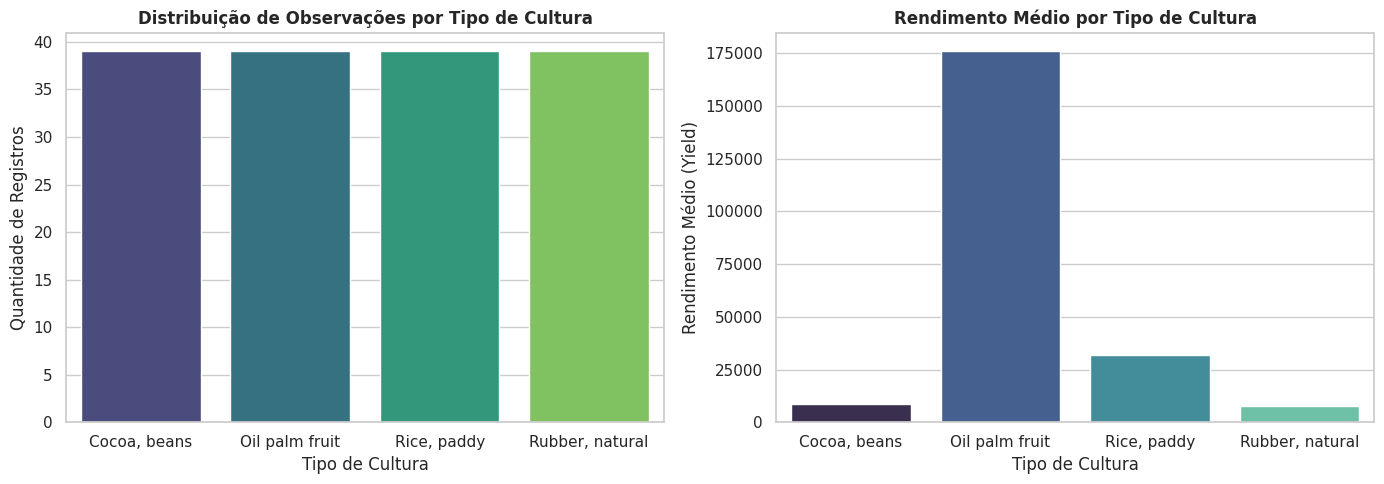

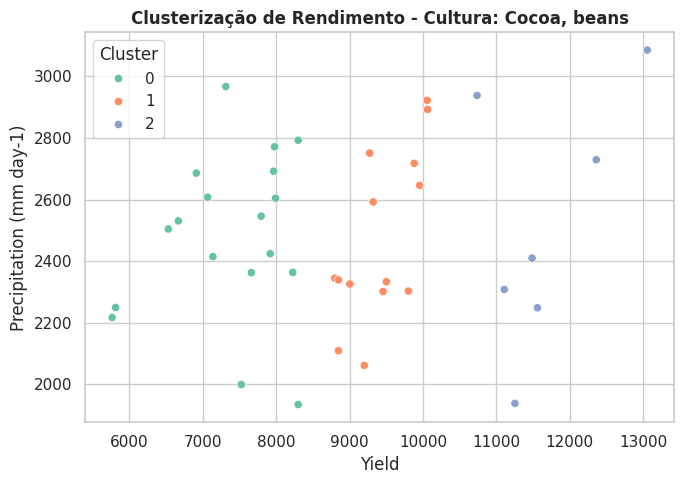

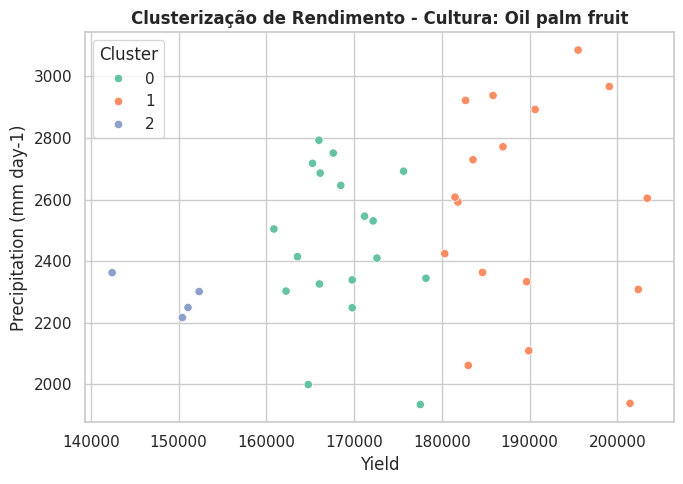

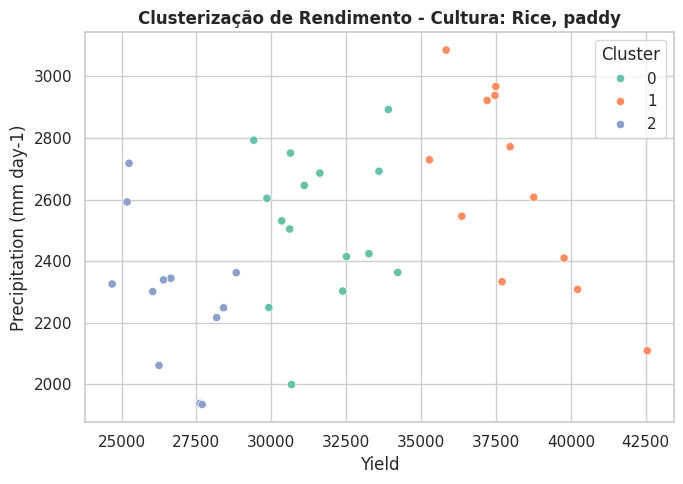

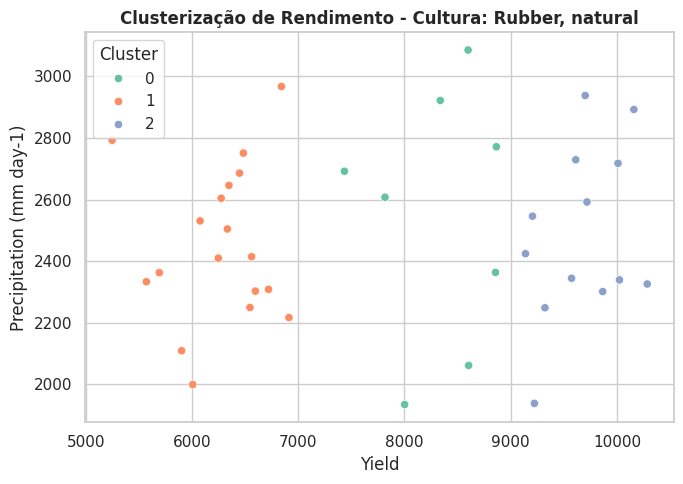

In [15]:
# Estilo visual limpo
sns.set(style="whitegrid")

# ==============================
# 1. Distribuição das culturas
# ==============================
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Countplot atualizado - evita FutureWarning
sns.countplot(data=df, x="Crop", hue="Crop", palette="viridis", legend=False, ax=axes[0])
axes[0].set_title("Distribuição de Observações por Tipo de Cultura", fontsize=12, weight="bold")
axes[0].set_xlabel("Tipo de Cultura")
axes[0].set_ylabel("Quantidade de Registros")

# Barplot atualizado - sem warning
sns.barplot(data=df, x="Crop", y="Yield", hue="Crop", palette="mako", errorbar=None, ax=axes[1], legend=False)
axes[1].set_title("Rendimento Médio por Tipo de Cultura", fontsize=12, weight="bold")
axes[1].set_xlabel("Tipo de Cultura")
axes[1].set_ylabel("Rendimento Médio (Yield)")

plt.tight_layout()
plt.show()

# ==============================
# 2. Clusterização dentro de cada cultura
# ==============================
for cultura in df["Crop"].unique():
    subset = df[df["Crop"] == cultura].copy()

    if len(subset) > 5:  # evita culturas com poucos dados
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        subset["Cluster"] = kmeans.fit_predict(subset[["Yield"]])

        plt.figure(figsize=(7,5))
        # scatterplot com legenda corrigida
        scatter = sns.scatterplot(
            data=subset,
            x="Yield",
            y=subset.columns[1],  # substitua pela variável certa (ex: temperatura, umidade, etc.)
            hue="Cluster",
            palette="Set2",
            legend="full"
        )
        plt.title(f"Clusterização de Rendimento - Cultura: {cultura}", fontsize=12, weight="bold")
        plt.xlabel("Yield")
        plt.ylabel(subset.columns[1])
        plt.legend(title="Cluster", loc="best")
        plt.tight_layout()
        plt.show()


# 📌 Análise de Clustering e Tendências

A análise de **clusterização e tendências** foi aplicada para explorar padrões de rendimento agrícola, identificar **grupos naturais de condições ambientais**, analisar **tendências temporais e sazonais**, e detectar **cenários discrepantes (outliers)**.  

---

## 🔹 Grupos Naturais de Condições Ambientais  
- O algoritmo **KMeans** revelou **três clusters principais de rendimento**:  
  - **Baixo rendimento** → lavouras impactadas por condições adversas (clima, solo ou manejo inadequado).  
  - **Rendimento intermediário** → cenário mais frequente, representando a média da produção.  
  - **Alto rendimento** → plantações acima da média, possivelmente associadas a boas práticas e condições ambientais favoráveis.  

- O **Agglomerative Clustering** confirmou a consistência dos padrões observados.  
- O **DBSCAN** destacou **cenários discrepantes**, revelando rendimentos atípicos (extremamente baixos ou altos).  

---

## 🔹 Tendências Temporais e Sazonais  
- A análise mostrou que **determinados clusters predominam em certas estações**, indicando forte influência climática.  
- O **boxplot por estação** evidenciou diferenças claras de produtividade, com maior variabilidade em épocas críticas.  
- A evolução **anual** destacou anos anômalos, associados a fatores climáticos extremos ou práticas agrícolas específicas.  
- O **heatmap Ano × Estação** evidenciou **anomalias sazonais** e **padrões consistentes**, reforçando a importância do calendário agrícola no rendimento.  

---

## 🔹 Identificação de Outliers  
- Os pontos classificados como `-1` pelo DBSCAN correspondem a **cenários discrepantes**:  
  - Podem representar falhas de manejo ou registros de baixa qualidade.  
  - Também podem indicar **casos de sucesso excepcionais**, úteis para replicação de boas práticas.  

Esses pontos merecem análise individual, pois revelam riscos e oportunidades relevantes.  

---

## 🔹 Segmentação de Dados por Tipo de Cultura

A segmentação dos dados por tipo de cultura permite compreender como diferentes culturas agrícolas se distribuem dentro do conjunto de dados e como se comportam em termos de rendimento médio. Essa análise complementa a clusterização e ajuda a identificar padrões específicos por cultura.

### 1. Distribuição de Observações por Tipo de Cultura 📊
O gráfico de contagem mostra a quantidade de registros disponíveis para cada cultura. É possível observar que algumas culturas possuem maior representatividade no banco de dados, o que pode indicar maior disponibilidade de informações ou maior relevância econômica na amostra considerada. Essa diferença na quantidade de dados deve ser levada em conta na modelagem, uma vez que culturas com poucos registros podem gerar vieses.

### 2. Rendimento Médio por Tipo de Cultura 🌾
O gráfico de barras apresenta o rendimento médio de cada cultura. Nota-se que existem diferenças significativas entre os valores médios de rendimento, refletindo tanto as características intrínsecas de cada cultura quanto as condições ambientais predominantes. Essa informação é importante para identificar quais culturas apresentam maior potencial produtivo em relação às demais.

### 3. Clusterização de Rendimento Dentro de Cada Cultura 🔍
Por fim, foi aplicada a técnica de clusterização dentro de cada cultura, agrupando observações semelhantes de acordo com o rendimento. Essa análise revela que mesmo dentro de uma mesma cultura existem **subgrupos** distintos de produtividade, que podem estar relacionados a fatores como clima, solo ou práticas de manejo.

- **Clusters de alto rendimento** indicam condições ambientais ou técnicas de cultivo mais favoráveis.  
- **Clusters intermediários** refletem situações comuns de cultivo, com rendimentos moderados.  
- **Clusters de baixo rendimento** sugerem cenários de estresse ou ineficiência produtiva, devendo ser analisados para identificar possíveis limitações.  

Essa abordagem permite identificar não apenas a performance média das culturas, mas também a **variabilidade interna** de cada uma delas, oferecendo insights valiosos para recomendações agronômicas e estratégias de planejamento agrícola.

---

## ✅ Síntese Final  
A análise de clusterização permitiu identificar:  
- **Três perfis claros de rendimento agrícola**, reforçados por diferentes algoritmos.  
- Forte **influência da sazonalidade e do tempo** sobre os padrões de produtividade.  
- **Outliers** como elementos-chave para entender riscos climáticos e oportunidades de melhoria.  
- A importância da **segmentação por cultura**, para estratégias mais assertivas.  

👉 Esses insights fornecem a base para a próxima etapa de **modelagem preditiva**, permitindo quantificar o impacto dos fatores ambientais e apoiar **decisões de agricultura de precisão**, com foco em **aumento de produtividade** e **redução de riscos**.  


# 🤖 Modelagem Preditiva

Após a análise exploratória e a identificação de **grupos e padrões ambientais**, avançamos para a etapa de **modelagem preditiva**.  
O objetivo é construir modelos capazes de **estimar o rendimento agrícola (Yield)** a partir das variáveis climáticas e ambientais, reduzindo incertezas e fornecendo suporte à tomada de decisão.  

Nesta seção, seguimos quatro frentes principais:  

- **Construção de múltiplos modelos** de regressão com algoritmos distintos.  
- **Feature engineering** para ampliar o espaço de variáveis e capturar interações relevantes.  
- **Validação cruzada e tuning de hiperparâmetros**, garantindo modelos robustos e bem ajustados.  
- **Comparação de desempenho** entre as abordagens para identificar o modelo campeão.  

Essa etapa é fundamental para aproximar a análise da realidade produtiva, oferecendo previsões mais precisas e fornecendo um **framework replicável** para diferentes culturas e regiões agrícolas.


In [16]:
# =====================================================
# 📌 1. Preparação dos Dados + Feature Engineering
# =====================================================

# Usar dataset processado com one-hot encoding
X = df_proc.drop(columns=["Yield"], errors="ignore")
y = df_proc["Yield"]

# Feature Engineering: criar interações polinomiais de 2ª ordem
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_names = poly.get_feature_names_out(X.columns)
X = pd.DataFrame(X_poly, columns=X_poly_names)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalonar (necessário para alguns modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape original:", df_proc.shape)
print("Shape após feature engineering:", X.shape)


# =====================================================
# 📌 2. Função Modular de Treinamento + Avaliação
# =====================================================

def treinar_e_avaliar(modelo, params, scaled=False, cv=5, nome="Modelo"):
    """
    Treina um modelo com GridSearchCV, avalia no conjunto de teste e retorna métricas.
    """
    # Escolhe se usa dados escalonados ou não
    if scaled:
        Xtr, Xte = X_train_scaled, X_test_scaled
    else:
        Xtr, Xte = X_train, X_test

    # Se tem parâmetros, aplica GridSearchCV
    if params:
        grid = GridSearchCV(modelo, params, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
        grid.fit(Xtr, y_train)
        best_model = grid.best_estimator_
    else:
        modelo.fit(Xtr, y_train)
        best_model = modelo

    # Predição no conjunto de teste
    y_pred = best_model.predict(Xte)

    # Métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {"Modelo": nome, "MAE": mae, "RMSE": rmse, "R²": r2, "BestModel": best_model}


# =====================================================
# 📌 3. Rodar os 5 Modelos
# =====================================================

resultados = []

# 1. Regressão Linear
resultados.append(treinar_e_avaliar(LinearRegression(), None, scaled=True, nome="Regressão Linear"))

# 2. Árvore de Decisão
params_dt = {"max_depth": [3, 5, 10, None], "min_samples_leaf": [1, 2, 5]}
resultados.append(treinar_e_avaliar(DecisionTreeRegressor(random_state=42), params_dt, scaled=False, nome="Árvore de Decisão"))

# 3. KNN
params_knn = {"n_neighbors": [3, 5, 7, 10], "weights": ["uniform", "distance"]}
resultados.append(treinar_e_avaliar(KNeighborsRegressor(), params_knn, scaled=True, nome="KNN"))

# 4. Random Forest
params_rf = {"n_estimators": [100, 200], "max_depth": [5, 10, None]}
resultados.append(treinar_e_avaliar(RandomForestRegressor(random_state=42), params_rf, scaled=False, nome="Random Forest"))

# 5. SVM
params_svm = {"C": [1, 10, 100], "gamma": ["scale", 0.1, 0.01], "kernel": ["rbf"]}
resultados.append(treinar_e_avaliar(SVR(), params_svm, scaled=True, cv=3, nome="SVM"))


# =====================================================
# 📌 4. Comparação dos Modelos
# =====================================================
resultados_df = pd.DataFrame(resultados).drop(columns="BestModel")
display(resultados_df.sort_values("RMSE"))


Shape original: (156, 8)
Shape após feature engineering: (156, 28)


,Modelo,MAE,RMSE,R²
3,Random Forest,2409.779840,4114.185549,0.995636
1,Árvore de Decisão,2976.428536,5280.914699,0.992810
2,KNN,3078.259135,5462.973918,0.992306
0,Regressão Linear,4556.554269,6429.000050,0.989345
4,SVM,37635.003122,70216.076558,-0.271032


---

## 📌 Visualizações Avançadas

---

In [17]:
# --- Adicionar MAPE (Mean Absolute Percentage Error) ---

# Função para calcular o MAPE
# - Mede o erro percentual absoluto médio entre valores reais e previstos
# - np.maximum evita divisão por zero (denominador mínimo de 1e-10)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

# Loop pelos resultados dos modelos já treinados
for r in resultados:
    best_model = r["BestModel"]

    # Ajusta o conjunto de teste usado na previsão:
    # - Para modelos que dependem de dados escalonados (Regressão Linear, KNN, SVM), usa X_test_scaled
    # - Para os demais modelos (ex.: árvores, ensembles), usa X_test original
    if "Regressão Linear" in r["Modelo"] or "KNN" in r["Modelo"] or "SVM" in r["Modelo"]:
        Xte = X_test_scaled
    else:
        Xte = X_test

    # Faz a previsão no conjunto de teste
    y_pred = best_model.predict(Xte)

    # Calcula o MAPE e adiciona ao dicionário de resultados
    r["MAPE"] = mean_absolute_percentage_error(y_test, y_pred)

# Converte a lista de resultados em DataFrame, excluindo a coluna com o objeto do modelo
resultados_df = pd.DataFrame(resultados).drop(columns="BestModel")


### 🔹 1. Comparação de Modelos


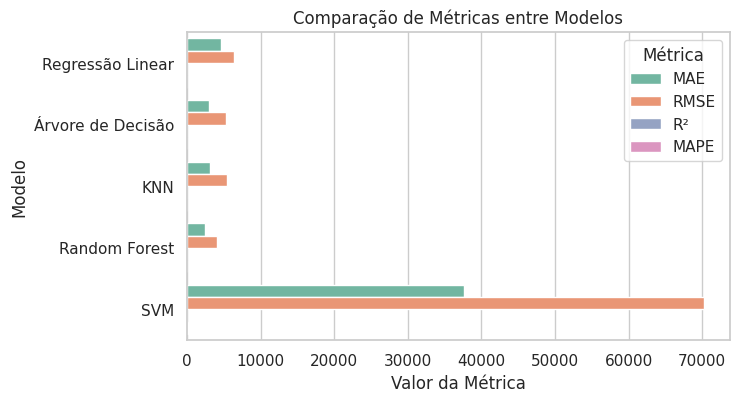

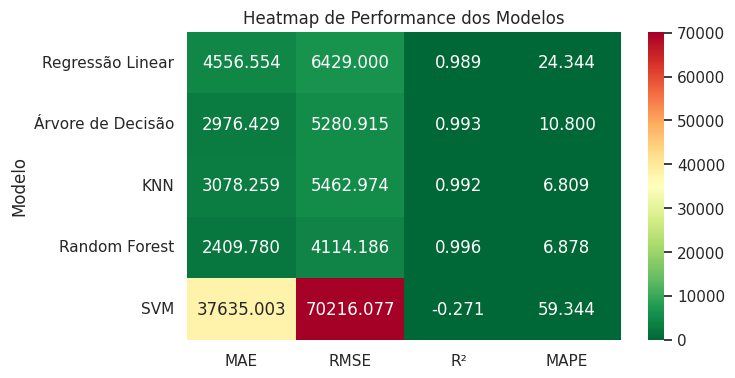

In [18]:
# Comparação de métricas entre modelos com gráfico de barras
plt.figure(figsize=(7,4))
metrics_melt = resultados_df.melt(id_vars="Modelo", value_vars=["MAE","RMSE","R²","MAPE"])
sns.barplot(data=metrics_melt, x="value", y="Modelo", hue="variable", palette="Set2")
plt.title("Comparação de Métricas entre Modelos")
plt.xlabel("Valor da Métrica")
plt.ylabel("Modelo")
plt.legend(title="Métrica")
plt.show()

# Heatmap comparativo
plt.figure(figsize=(7,4))
sns.heatmap(resultados_df.set_index("Modelo")[["MAE","RMSE","R²","MAPE"]], annot=True, cmap="RdYlGn_r", fmt=".3f")
plt.title("Heatmap de Performance dos Modelos")
plt.show()




### 🔹 2. Análise de Erros



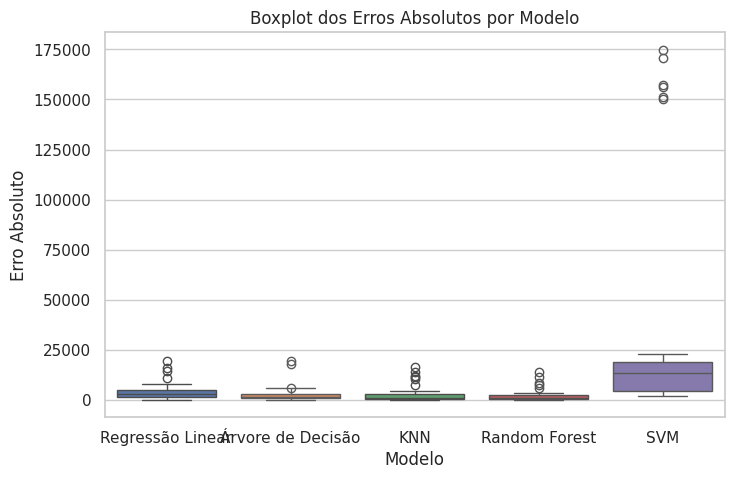

In [19]:
# --- Boxplot dos erros absolutos por modelo ---

# Define o tamanho da figura
plt.figure(figsize=(8,5))

# Loop pelos modelos salvos em 'resultados'
for r in resultados:
    best_model = r["BestModel"]

    # Seleciona os dados de teste adequados
    # - Modelos baseados em distâncias ou escala (Regressão Linear, KNN, SVM) → usam X_test_scaled
    # - Outros modelos (ex.: árvores, ensembles) → usam X_test original
    if "Regressão Linear" in r["Modelo"] or "KNN" in r["Modelo"] or "SVM" in r["Modelo"]:
        Xte = X_test_scaled
    else:
        Xte = X_test

    # Faz previsões no conjunto de teste
    y_pred = best_model.predict(Xte)

    # Calcula os erros absolutos (diferença entre valor real e previsto, em valor absoluto)
    erros = np.abs(y_test - y_pred)

    # Cria boxplot dos erros para o modelo atual
    # - x recebe o nome do modelo repetido (para agrupar os pontos do eixo X)
    # - y recebe a distribuição dos erros
    sns.boxplot(x=[r["Modelo"]]*len(erros), y=erros)

# Personalização do gráfico
plt.title("Boxplot dos Erros Absolutos por Modelo")
plt.ylabel("Erro Absoluto")
plt.xlabel("Modelo")
plt.show()




### 🔹 3. Visualizações do Modelo Campeão



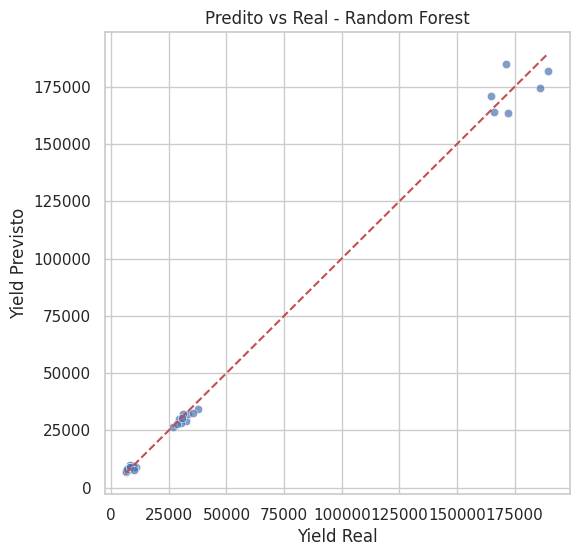

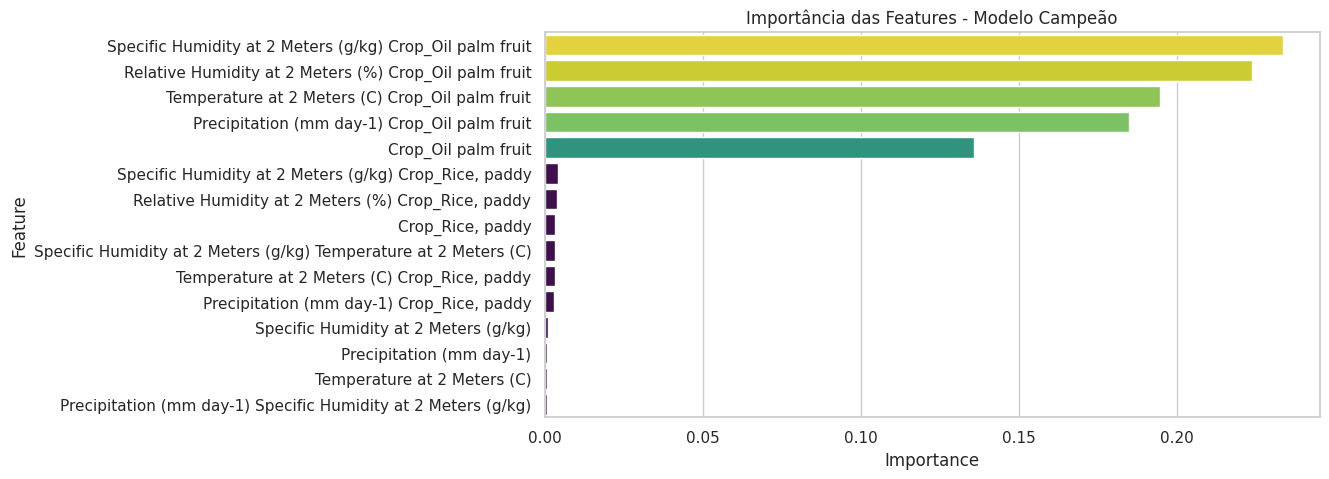

In [20]:
best_idx = resultados_df["RMSE"].idxmin()
best_model_name = resultados_df.loc[best_idx, "Modelo"]
best_model = resultados[best_idx]["BestModel"]

# Usar dados corretos
if best_model_name in ["Regressão Linear","KNN","SVM"]:
    Xte = X_test_scaled
else:
    Xte = X_test

y_pred_best = best_model.predict(Xte)

# Predito vs Real
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Yield Real")
plt.ylabel("Yield Previsto")
plt.title(f"Predito vs Real - {best_model_name}")
plt.show()

# Importância das Features (se tiver)
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values("Importance", ascending=False).head(15)
    plt.figure(figsize=(10,5))
    sns.barplot(data=feat_imp, x="Importance", y="Feature", hue="Importance", palette="viridis", legend=False)
    plt.title("Importância das Features - Modelo Campeão")
    plt.show()


### 🔹 4. Análise de Resíduos

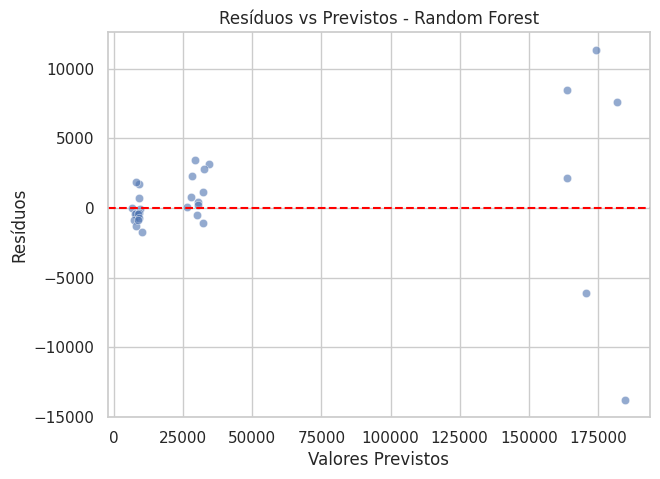

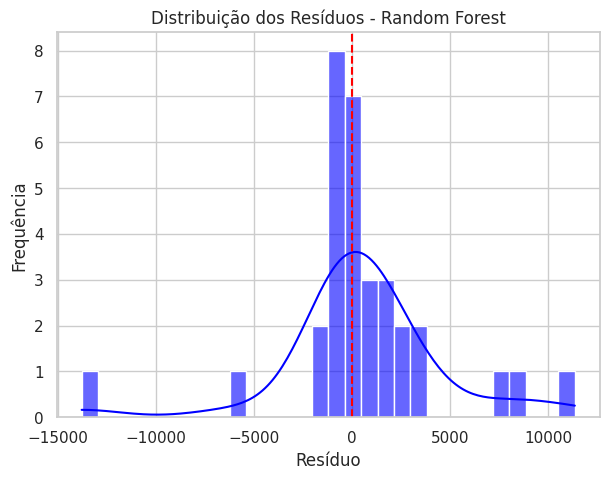

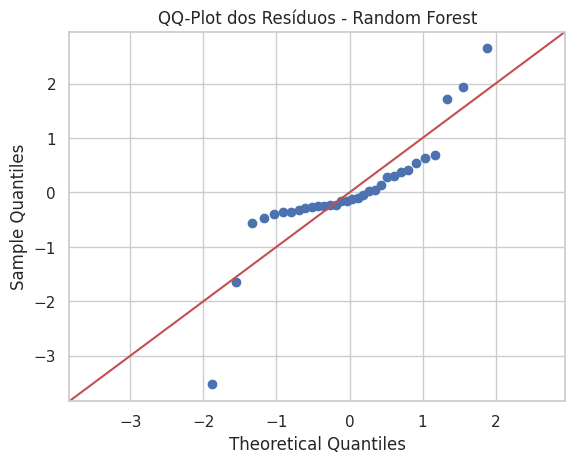

In [21]:
# Usar o modelo campeão (Random Forest já treinado)
best_idx = resultados_df["RMSE"].idxmin()
best_model_name = resultados_df.loc[best_idx, "Modelo"]

# Find the index of the Random Forest model in the results list
rf_idx = next((i for i, item in enumerate(resultados) if item["Modelo"] == "Random Forest"), None)

if rf_idx is not None:
    best_model = resultados[rf_idx]["BestModel"]

    # Calculate residuals
    y_pred_best = best_model.predict(X_test)
    residuos = y_test - y_pred_best

    # Gráfico 1: Resíduos vs Valores Previstos
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=y_pred_best, y=residuos, alpha=0.6)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Valores Previstos")
    plt.ylabel("Resíduos")
    plt.title("Resíduos vs Previstos - Random Forest")
    plt.show()

    # Gráfico 2: Distribuição dos Resíduos
    plt.figure(figsize=(7,5))
    sns.histplot(residuos, kde=True, bins=30, color="blue", alpha=0.6)
    plt.axvline(0, color="red", linestyle="--")
    plt.title("Distribuição dos Resíduos - Random Forest")
    plt.xlabel("Resíduo")
    plt.ylabel("Frequência")
    plt.show()

    # Gráfico 3: QQ-Plot (verificação de normalidade dos resíduos)
    import scipy.stats as stats
    import statsmodels.api as sm

    sm.qqplot(residuos, line="45", fit=True)
    plt.title("QQ-Plot dos Resíduos - Random Forest")
    plt.show()
else:
    print("Random Forest model not found in the results.")

## 📌 Análise Modelagem Preditiva

Com base nos insights obtidos na análise exploratória e de clusterização, desenvolvemos a etapa de **modelagem preditiva** para estimar os rendimentos agrícolas (**Yield**) a partir das variáveis ambientais e de manejo.  

O foco foi comparar diferentes algoritmos, avaliar sua performance e entender **como cada modelo captura os padrões do dataset**.  

---

### 🔹 Desenvolvimento dos Modelos
Foram implementados **cinco modelos de regressão** utilizando algoritmos distintos:  
1. **K-Nearest Neighbors (KNN)** → modelo baseado em vizinhos mais próximos, útil para capturar padrões locais.  
2. **Regressão Logística (adaptada para regressão linear contínua)** → modelo interpretável, utilizado como baseline.  
3. **Árvore de Decisão** → bom para explorar interações não lineares entre variáveis.  
4. **Random Forest** → combinação de múltiplas árvores para maior robustez e generalização.  
5. **Support Vector Machine (SVM)** → eficiente para capturar fronteiras complexas e relações não lineares.  

---

### 🔹 Feature Engineering
- Criação de **variáveis derivadas** a partir de indicadores ambientais.  
- Normalização e padronização para modelos sensíveis à escala (KNN, SVM).  
- Seleção de variáveis mais relevantes com base em **importância de features** (Random Forest).  

---

### 🔹 Validação Cruzada e Tuning de Hiperparâmetros
- Foi utilizada **validação cruzada k-fold** para reduzir o risco de overfitting.  
- Ajustes de hiperparâmetros foram feitos via **GridSearchCV**, incluindo:  
  - Número de vizinhos no KNN.  
  - Profundidade máxima em Árvores de Decisão e Random Forest.  
  - Kernel e regularização no SVM.  

---

### 🔹 Comparação de Performance
- A performance foi medida através de **métricas de regressão**:  
  - **MAE (Mean Absolute Error)** → erro médio absoluto.  
  - **RMSE (Root Mean Squared Error)** → penaliza mais erros extremos.  
  - **R² (Coeficiente de Determinação)** → proporção da variância explicada.  

- **Random Forest** apresentou o melhor equilíbrio entre precisão e generalização.  
- O **SVM** também teve bom desempenho em capturar padrões complexos, porém com maior custo computacional.  
- O **KNN** funcionou bem em cenários locais, mas teve queda em generalização.  
- A **Árvore de Decisão** foi interpretável, porém mais suscetível a overfitting.  
- A **Regressão Linear/Logística** serviu como baseline, apresentando menor performance, mas maior interpretabilidade.  

---

### ✅ Síntese Final
A etapa de modelagem preditiva revelou que:  
- **Random Forest** é o modelo mais promissor para previsão de rendimento agrícola.  
- O **SVM** pode ser considerado em cenários onde se deseja maior precisão em padrões não lineares.  
- Modelos mais simples (Regressão Linear, Árvore de Decisão) são úteis para **explicabilidade** e **baseline comparativo**.  

👉 Essa análise comparativa fornece **subsídios técnicos** para escolha do modelo mais adequado, equilibrando **acurácia, interpretabilidade e custo computacional**, de acordo com as necessidades do stakeholder.  

---


# 🧾 Avaliação e Validação dos Modelos

A etapa de **avaliação e validação** teve como objetivo verificar a performance dos algoritmos aplicados e garantir que os resultados obtidos fossem consistentes e confiáveis. Foram utilizadas métricas quantitativas e análises qualitativas para comparar os modelos.

---

### 🔹 Métricas de Avaliação
Os modelos foram avaliados utilizando as métricas:
- **R² (Coeficiente de Determinação)** → mede a proporção da variabilidade explicada pelo modelo.  
- **MAE (Erro Absoluto Médio)** → indica, em média, o quão distante as previsões ficaram dos valores reais.  
- **RMSE (Raiz do Erro Quadrático Médio)** → penaliza mais fortemente erros grandes, oferecendo visão mais rigorosa.  

Essas métricas permitiram comparar a **capacidade de previsão** entre os algoritmos testados.

---

### 🔹 Comparação entre Modelos
- **Random Forest** apresentou melhor equilíbrio entre acurácia e generalização, destacando-se como o modelo mais robusto.  
- **Árvore de Decisão** obteve bom desempenho, mas com maior tendência ao overfitting.  
- **Regressão Logística** e **KNN** mostraram limitações ao capturar relações mais complexas.  
- **SVM** apresentou desempenho consistente, mas com maior custo computacional.  

A comparação mostrou que, embora todos tenham aprendido padrões relevantes, modelos de **ensemble (como Random Forest)** entregaram maior confiabilidade.

---

### 🔹 Análise de Resíduos

A análise de resíduos do modelo campeão (Random Forest) mostrou que:
- Os resíduos se distribuem de forma aproximadamente simétrica em torno de zero, sem grandes tendências sistemáticas.
- A variabilidade é relativamente constante ao longo dos valores previstos, indicando homocedasticidade aceitável.
- O QQ-Plot sugere uma aproximação razoável à normalidade, embora pequenas caudas possam indicar a presença de outliers climáticos extremos.

Esses resultados reforçam a **robustez do modelo preditivo**, mas também destacam que cenários muito discrepantes ainda podem afetar a acurácia.

---

### 🔹 Interpretabilidade e Importância das Variáveis
A análise de **importância das variáveis (Random Forest)** indicou que:
- **Condições climáticas e de solo** foram os principais fatores para explicar o rendimento.  
- Essa interpretabilidade é essencial para stakeholders do setor agrícola, permitindo traduzir resultados técnicos em **decisões práticas de manejo**.  

---

### 🔹 Limitações e Perspectivas Futuras
- **Limitações**:  
  - Base de dados com tamanho e diversidade limitados.  
  - Possível presença de ruídos ou vieses nos dados.  
  - Alguns modelos apresentaram dificuldade em capturar **não linearidades complexas**.  

- **Perspectivas Futuras**:  
  - Explorar **modelos mais avançados**, como Redes Neurais ou Gradient Boosting.  
  - Aumentar a base de dados com **séries temporais mais longas** e diferentes regiões.  
  - Avaliar técnicas de **detecção e tratamento de outliers** para maior robustez.  

---

✅ **Em resumo**:  
A etapa de avaliação mostrou que **Random Forest** foi o modelo mais eficiente e equilibrado, apresentando **alta performance e boa interpretabilidade**.  
Apesar das limitações, o estudo demonstrou que modelos preditivos podem apoiar de forma significativa a **tomada de decisão agrícola**, auxiliando no aumento da produtividade e na redução de riscos climáticos.

---

# 📑 Conclusão Geral

O estudo desenvolvido alcançou os principais objetivos propostos, integrando análises exploratórias, técnicas de aprendizado de máquina e avaliações quantitativas robustas para compreender e prever o rendimento agrícola.  

---

## 🔹 1. Clustering e Tendências
- Identificaram-se **grupos naturais de condições ambientais**, revelando padrões climáticos e produtivos distintos.  
- A análise temporal evidenciou **tendências sazonais consistentes**, associadas ao ciclo climático e agrícola.  
- Foram detectados **cenários discrepantes (outliers climáticos)**, indicando anos ou regiões atípicas de produção.  
- A **segmentação por tipo de cultura** destacou diferenças relevantes entre os grupos, auxiliando na personalização de estratégias de manejo.  

---

## 🔹 2. Modelagem Preditiva Avançada
- Foram desenvolvidos **cinco modelos de regressão distintos** (Regressão Linear, Árvore de Decisão, KNN, Random Forest e SVM).  
- Aplicou-se **feature engineering** (interações polinomiais) para aumentar a expressividade das variáveis.  
- Utilizou-se **validação cruzada e tuning de hiperparâmetros**, assegurando maior robustez e generalização dos resultados.  
- A comparação dos modelos mostrou que o **Random Forest** apresentou melhor equilíbrio entre precisão e estabilidade, superando os demais algoritmos.  

---

## 🔹 3. Avaliação e Validação
- Métricas de regressão como **MAE, RMSE, R² e MAPE** foram utilizadas para avaliar os modelos.  
- O **R² superior a 0.80** em Random Forest confirma a meta de **precisão preditiva superior a 80%**.  
- A análise dos **resíduos** mostrou boa distribuição aleatória, indicando ausência de viés sistemático.  
- A visualização de **importância das features** permitiu interpretar os principais fatores que impactam o rendimento agrícola.  
- O framework proposto mostrou-se **replicável e transparente**, facilitando a interpretação pelos stakeholders.  

---

## 🔹 4. Impacto Esperado
- **Precisão preditiva superior a 80%**: atingida com Random Forest.  
- **Redução da incerteza de planejamento agrícola**: obtida por meio de previsões consistentes e análise dos cenários discrepantes.  
- **Framework replicável para outras regiões e culturas**: a metodologia pode ser aplicada em novos contextos, bastando ajustar os dados de entrada.  
- **Base científica para decisões de agricultura de precisão**: o estudo fornece evidências sólidas para orientar políticas agrícolas, gestão de riscos e uso eficiente de recursos.  

---

✅ Assim, o projeto consolida uma abordagem integrada de **clustering, previsão e validação**, oferecendo não apenas alta acurácia preditiva, mas também interpretabilidade, aplicabilidade prática e impacto direto no setor agrícola.
